# Installing and importing packages

In [1]:
sc.install_pypi_package("boto3")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.11.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1654031629754_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
import boto3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
import pyspark.sql.functions as f
from sparknlp.base import *
from sparknlp.annotator import *
import sparknlp


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Read data from S3

In [33]:
data = spark.read.option("header", True).option("multiline", True).option("escape","\"").csv('s3://lsc-projct/*.csv')
data = data.na.drop(subset=['username', 'content'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
# convert columns to their original types
cols = ['reply', 'retweet', 'likes']
for col_name in cols:
    data = data.withColumn(col_name, f.col(col_name).cast('int'))

data = data.withColumn('date', f.to_date('date')) \
        .withColumn('time', f.to_timestamp('time'))

udf_ = f.udf(lambda x: ast.literal_eval(x))
data = data.withColumn('hashtags', udf_('hashtags')) \
    .withColumn('mentions', udf_('mentions'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
data

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[tweetid: string, username: string, content: string, reply: int, retweet: int, likes: int, date: date, time: timestamp, hashtags: string, mentions: string]

## Visualize column distributions

In [58]:
# find count of an integer column and plot the distribution
def plot_int_dist(col_name):
    c = data[[col_name]].groupBy(col_name).count().sort(col_name)
    df = c.toPandas()
    plt.close()
    sns.barplot(x=col_name, y='count', data=df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

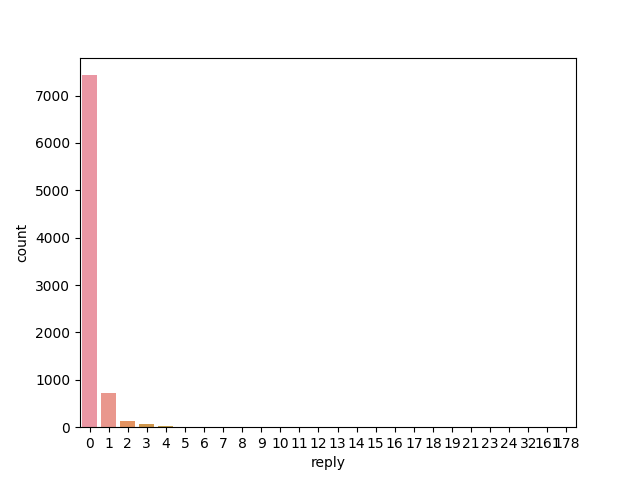

In [55]:
plot_int_dist('reply')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

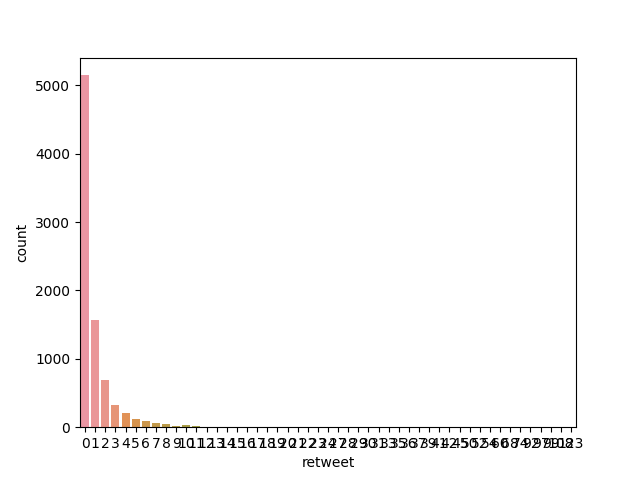

In [60]:
plot_int_dist('retweet')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

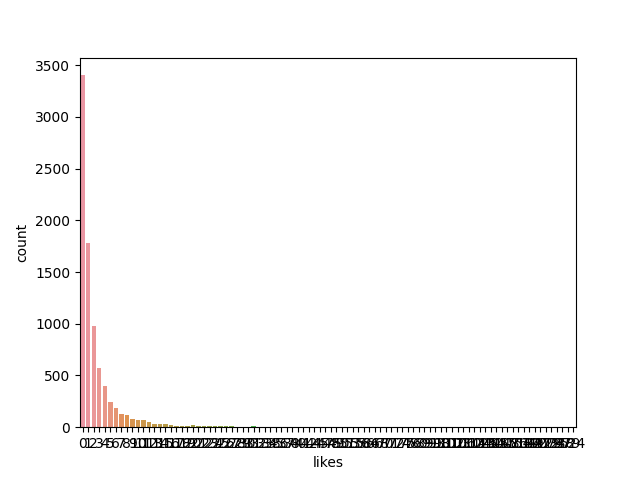

In [61]:
plot_int_dist('likes')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

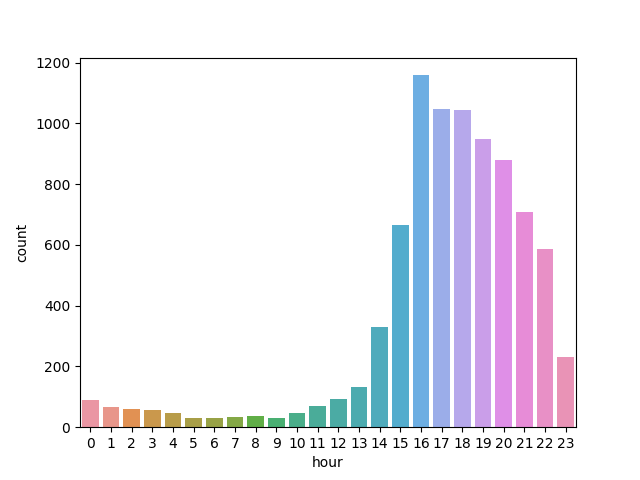

In [64]:
# plot hourly post count distribution
hour = data.select(f.hour('time').alias('hour')).groupBy('hour').count().sort('hour')
hour_df = hour.toPandas()
plt.close()
sns.barplot(x='hour', y='count', data=hour_df)
%matplot plt